In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import qgrid

In [2]:
count = 0
files = []
for r, d, f in os.walk(os.path.join(os.getcwd(),"data")):
    for file in f:
        if "dataManipulation" in file or 'checkpoint' in file:
            continue
        if '.csv'  in file:
            files.append(os.path.join(r, file))
            count += 1
print(count)


126


In [3]:
q = []
for f in files:
    ques = pd.read_csv(f)
    if '_t_' in f:
        ques['isTrue'] = [1 for i in range(ques.shape[0])]
    elif '_f_' in f:
        ques['isTrue'] = [0 for i in range(ques.shape[0])]
    q.append(ques)
dataset = pd.concat(q)
dataset.head()

,poorSignal,rawValue,highAlpha,lowAlpha,highBeta,lowBeta,midGamma,lowGamma,delta,theta,attention,meditation,isTrue
0,0.0,-1610.0,1580.0,5149.0,1230.0,7160.0,471.0,817.0,976484.0,35033.0,0.0,0.0,0
1,0.0,-177.0,1580.0,5149.0,1230.0,7160.0,471.0,817.0,976484.0,35033.0,0.0,0.0,0
2,0.0,23.0,1580.0,5149.0,1230.0,7160.0,471.0,817.0,976484.0,35033.0,0.0,0.0,0
3,0.0,213.0,1580.0,5149.0,1230.0,7160.0,471.0,817.0,976484.0,35033.0,0.0,0.0,0
4,0.0,1341.0,1580.0,5149.0,1230.0,7160.0,471.0,817.0,976484.0,35033.0,0.0,0.0,0


In [4]:
table = qgrid.show_grid(dataset,grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})
table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [5]:
# meanData =
meanQ = []
for data in q:
    data = data[data['poorSignal']==0]
    data = data.drop(['poorSignal','rawValue','delta','theta','meditation',],axis=1)
    data = pd.DataFrame(data.mean()).T
    if not data.isnull().values.any():
        meanQ.append(data)
meanData = pd.concat(meanQ,ignore_index=True,)
meanData.describe()

,highAlpha,lowAlpha,highBeta,lowBeta,midGamma,lowGamma,attention,isTrue
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,32081.536054,39595.624892,23190.424825,32913.444651,5344.279141,10874.193340,37.719354,0.520325
std,35492.072301,28937.317974,25624.823659,39851.834736,15610.691255,17113.003877,22.360834,0.501630
min,3320.000000,1465.000000,1212.000000,2213.714286,334.333333,659.666667,0.000000,0.000000
25%,13836.092157,18933.313602,8623.103968,11650.921053,1913.055921,3764.759259,24.500000,0.000000
50%,23500.255814,33452.085106,13580.842105,20075.600000,3035.534884,6805.000000,39.153846,1.000000
75%,39555.333333,54179.361324,28907.487427,37500.298920,5059.907574,12773.066105,51.500000,1.000000
max,330353.153846,180672.000000,170450.000000,240547.172414,171390.000000,176334.000000,90.285714,1.000000


In [6]:
table = qgrid.show_grid(meanData,)
table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

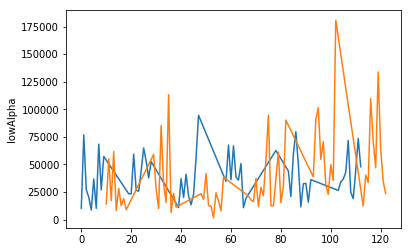

In [10]:
meanTrueData = meanData[meanData['isTrue']==0]
meanFalseData = meanData[meanData['isTrue']==1]
sns.lineplot(x=meanTrueData.index, y="lowAlpha", data=meanTrueData,)
sns.lineplot(x=meanFalseData.index, y="lowAlpha", data=meanFalseData)

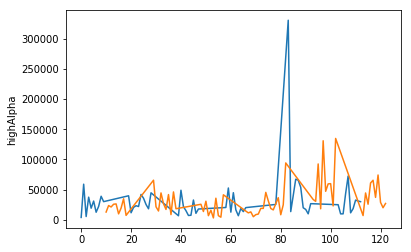

In [13]:
sns.lineplot(x=meanTrueData.index, y="highAlpha", data=meanTrueData,)
sns.lineplot(x=meanFalseData.index, y="highAlpha", data=meanFalseData)

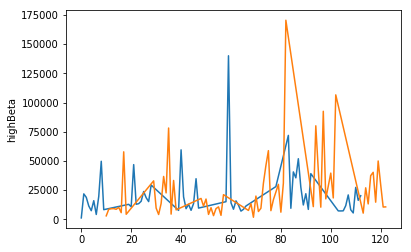

In [14]:
sns.lineplot(x=meanTrueData.index, y="highBeta", data=meanTrueData,)
sns.lineplot(x=meanFalseData.index, y="highBeta", data=meanFalseData)

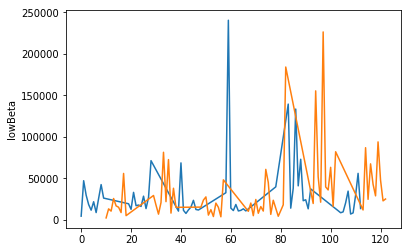

In [15]:
sns.lineplot(x=meanTrueData.index, y="lowBeta", data=meanTrueData,)
sns.lineplot(x=meanFalseData.index, y="lowBeta", data=meanFalseData)

In [16]:
dataset.describe()

,poorSignal,rawValue,highAlpha,lowAlpha,highBeta,lowBeta,midGamma,lowGamma,delta,theta,attention,meditation,isTrue
count,9086.000000,9086.000000,9.086000e+03,9.086000e+03,9.086000e+03,9.086000e+03,9086.000000,9086.000000,9.086000e+03,9.086000e+03,9086.000000,9086.000000,10342.000000
mean,28.104667,58.016069,4.049490e+04,4.327430e+04,3.115480e+04,4.037130e+04,7234.594211,14165.506383,6.411811e+05,1.446463e+05,37.258199,42.846027,0.562560
std,38.102003,427.549693,8.650592e+04,8.519813e+04,7.867573e+04,9.543283e+04,18025.918570,44144.722966,6.670865e+05,2.476721e+05,26.453503,29.881515,0.496095
min,0.000000,-2048.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,13.000000,3.917000e+03,4.431000e+03,2.290000e+03,3.181000e+03,455.250000,875.000000,8.742400e+04,1.548300e+04,13.000000,16.000000,0.000000
50%,25.000000,54.000000,1.424200e+04,1.623600e+04,9.133000e+03,1.154800e+04,1729.000000,3467.000000,4.052080e+05,6.062750e+04,38.000000,47.000000,1.000000
75%,51.000000,109.000000,3.908625e+04,4.630200e+04,2.673100e+04,3.340700e+04,5502.000000,11664.000000,9.858550e+05,1.572900e+05,56.000000,66.000000,1.000000
max,200.000000,2047.000000,1.027108e+06,1.260920e+06,1.077747e+06,1.118132e+06,171390.000000,912987.000000,3.209320e+06,3.301388e+06,100.000000,100.000000,1.000000


In [17]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 0 to 95
Data columns (total 13 columns):
poorSignal    9086 non-null float64
rawValue      9086 non-null float64
highAlpha     9086 non-null float64
lowAlpha      9086 non-null float64
highBeta      9086 non-null float64
lowBeta       9086 non-null float64
midGamma      9086 non-null float64
lowGamma      9086 non-null float64
delta         9086 non-null float64
theta         9086 non-null float64
attention     9086 non-null float64
meditation    9086 non-null float64
isTrue        10342 non-null int64
dtypes: float64(12), int64(1)
memory usage: 1.1 MB
None


In [18]:
dataset = dataset[dataset['poorSignal']==0]
dataset.shape

(4258, 13)

In [19]:
dataset = dataset.drop(['poorSignal','rawValue','delta','theta','meditation',],axis=1)
dataset = dataset.reset_index(drop=True)
dataset.head()

,highAlpha,lowAlpha,highBeta,lowBeta,midGamma,lowGamma,attention,isTrue
0,1580.0,5149.0,1230.0,7160.0,471.0,817.0,0.0,0
1,1580.0,5149.0,1230.0,7160.0,471.0,817.0,0.0,0
2,1580.0,5149.0,1230.0,7160.0,471.0,817.0,0.0,0
3,1580.0,5149.0,1230.0,7160.0,471.0,817.0,0.0,0
4,1580.0,5149.0,1230.0,7160.0,471.0,817.0,0.0,0


In [20]:
df = dataset.groupby('isTrue').describe().stack()
df

attention      highAlpha       highBeta       lowAlpha  \
isTrue                                                                   
0      count  2150.000000    2150.000000    2150.000000    2150.000000   
       mean     43.227907   29898.057674   20068.766512   39094.301395   
       std      23.935818   42770.506988   32440.348686   47028.994659   
       min       0.000000     488.000000     492.000000     290.000000   
       25%      27.000000    6075.000000    4952.000000    8178.000000   
       50%      43.000000   15256.000000   10500.000000   20705.000000   
       75%      57.000000   36850.250000   21662.250000   54457.000000   
       max     100.000000  404986.000000  366426.000000  327155.000000   
1      count  2108.000000    2108.000000    2108.000000    2108.000000   
       mean     36.527989   31153.014231   22292.368121   37925.675996   
       std      26.792292   43054.440218   33495.545665   57187.682344   
       min       0.000000     747.000000     797.000000     311.000000   
       25%       8.000000    6537.000000    4942.000000    8922.000000   
       50%      38.000000   17775.000000    9859.000000   18671.000000   
       75%      57.000000   37582.000000   24352.000000   41047.000000   
       max      96.000000  338094.000000  231930.000000  378978.000000   

                    lowBeta       lowGamma       midGamma  
isTrue                                                     
0      count    2150.000000    2150.000000    2150.000000  
       mean    29384.372558   10135.672093    4373.831628  
       std     60995.885672   14922.767401   11006.252356  
       min       692.000000     372.000000      34.000000  
       25%      6327.000000    2446.000000    1025.000000  
       50%     12635.000000    5228.000000    2401.000000  
       75%     28817.000000   12399.000000    5080.000000  
       max    661171.000000  150882.000000  151289.000000  
1      count    2108.000000    2108.000000    2108.000000  
       mean    32646.392315    9676.710152    4590.492884  
       std     54154.281170   15546.071954   11739.819461  
       min       577.000000     173.000000      48.000000  
       25%      6265.500000    2112.000000     806.000000  
       50%     15982.000000    4351.000000    2052.000000  
       75%     33407.000000   12138.000000    4602.000000  
       max    459371.000000  176334.000000  171390.000000

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
scaleCol = ['attention','highAlpha','highBeta','lowAlpha','lowBeta','lowGamma','midGamma']
dataset[scaleCol] = scaler.fit_transform(dataset[scaleCol])
dataset.head()

,highAlpha,lowAlpha,highBeta,lowBeta,midGamma,lowGamma,attention,isTrue
0,0.0027,0.012831,0.002017,0.009965,0.00255,0.003656,0.0,0
1,0.0027,0.012831,0.002017,0.009965,0.00255,0.003656,0.0,0
2,0.0027,0.012831,0.002017,0.009965,0.00255,0.003656,0.0,0
3,0.0027,0.012831,0.002017,0.009965,0.00255,0.003656,0.0,0
4,0.0027,0.012831,0.002017,0.009965,0.00255,0.003656,0.0,0


In [23]:
dataset.groupby('isTrue').describe().stack()

attention    highAlpha     highBeta     lowAlpha      lowBeta  \
isTrue                                                                          
0      count  2150.000000  2150.000000  2150.000000  2150.000000  2150.000000   
       mean      0.432279     0.072708     0.053498     0.102470     0.043608   
       std       0.239358     0.105737     0.088651     0.124189     0.092335   
       min       0.000000     0.000000     0.000000     0.000000     0.000174   
       25%       0.270000     0.013812     0.012188     0.020830     0.008704   
       50%       0.430000     0.036509     0.027349     0.053910     0.018253   
       75%       0.570000     0.089895     0.057853     0.143039     0.042749   
       max       1.000000     1.000000     1.000000     0.863151     1.000000   
1      count  2108.000000  2108.000000  2108.000000  2108.000000  2108.000000   
       mean      0.365280     0.075810     0.059575     0.099384     0.048546   
       std       0.267923     0.106439     0.091534     0.151015     0.081978   
       min       0.000000     0.000640     0.000833     0.000055     0.000000   
       25%       0.080000     0.014954     0.012161     0.022794     0.008611   
       50%       0.380000     0.042737     0.025598     0.048539     0.023320   
       75%       0.570000     0.091704     0.065203     0.107627     0.049698   
       max       0.960000     0.834630     0.632458     1.000000     0.694517   

                 lowGamma     midGamma  
isTrue                                  
0      count  2150.000000  2150.000000  
       mean      0.056554     0.025326  
       std       0.084711     0.064230  
       min       0.001130     0.000000  
       25%       0.012903     0.005783  
       50%       0.028695     0.013813  
       75%       0.069402     0.029447  
       max       0.855519     0.882695  
1      count  2108.000000  2108.000000  
       mean      0.053949     0.026591  
       std       0.088249     0.068511  
       min       0.000000     0.000082  
       25%       0.011007     0.004505  
       50%       0.023717     0.011777  
       75%       0.067921     0.026658  
       max       1.000000     1.000000

In [ ]:
dataset.to_csv('dataset.csv')